<a href="https://colab.research.google.com/github/AnBa37/Pemograman_Python/blob/main/Pertemuan%2011_Image%20Classification%202..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [38]:
ls

'1101174145_AnggitBagaskara (1).docx'
'1101174145_AnggitBagaskara (2).docx'
 1101174145_AnggitBagaskara.docx
'1101174145 Anggit Bagaskara FINAL TEST TT-41-09.pdf'
'1101174145 Anggit Bagaskara No.2 TT-41-09 (1).pdf'
'1101174145 Anggit Bagaskara No.2 TT-41-09.pdf'
'1101174145 Anggit Bagaskara No.3.1  TT-41-09(1) (1).pdf'
'1101174145 Anggit Bagaskara No.3.1  TT-41-09(1).pdf'
'1101174145 Anggit Bagaskara No.3.1  TT-41-09.pdf'
 117951_1603374149_fd
 122579_1603902317_Ep_4_fd
 126414_1604372632_Ep_8_fd
 3scene/
 404368.720_98572.txt
 420817.720_148218.txt
 554733.720_16173.txt
 579955.480_575206.txt
 590401.480_29332.txt
 AlasPersegiPanjang.java
 AnggitBagaskara_1101174145_LatianUTS.pdf
'Anggit Bagaskara_1101174145_PBOMandiri2.pdf'
'Anggit Bagaskara_1101174145.pdf'
'Anggit Bagaskara_1101174145_Quiz1PSWD.pdf'
'Anggit Bagaskara_1101174145_Tugas 3A.pdf'
'Anggit Bagaskara_1101174145_Tugas 3B.pdf'
'Anggit Bagaskara_1101174145_Tugas3SKO.pdf'
'Anggit Bagaskara_1101174145_Tugas4SKO.pdf'
'Anggit Baga

In [10]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [96]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [97]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [98]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [99]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [100]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [101]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1055, 64, 64, 3)
(352, 64, 64, 3)


In [104]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1= Sequential()
model1.add(Convolution2D(8, 3,3, activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, 3,3, activation='relu'))
model1.add(MaxPooling2D(2,2))
#Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 21, 21, 8)         224       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 8)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 16)          1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_9 (Dense)              (None, 5)               

In [105]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model1 = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(5, activation = "softmax", name="layer4"),
    ]
)

In [ ]:
model.summary()

In [106]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [107]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25


ValueError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


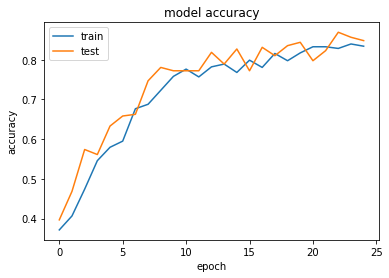

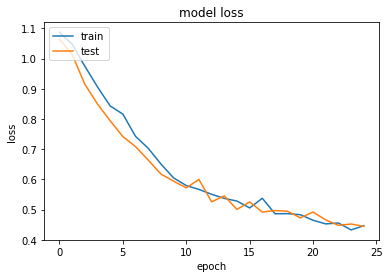

In [108]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...


AxisError: ignored